In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.applications.densenet import DenseNet169
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, concatenate, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adamax

2023-08-01 02:47:33.983828: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 02:47:34.127415: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [3]:
model_nas = DenseNet169(weights='imagenet', include_top=False, input_shape=(32, 32, 3), pooling='max')
model_nas.trainable = False

In [4]:
model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3), pooling='max') # no pooling
model_vgg.trainable = True

In [5]:
model_nas_out = model_nas.output
model_nas_out = Flatten()(model_nas_out)
model_vgg_out = model_vgg.output
model_vgg_out = Flatten()(model_vgg_out)
x = concatenate([model_nas_out, model_vgg_out])
x = Dense(10, activation='softmax')(x)

In [6]:
model = Model(inputs=[model_nas.input, model_vgg.input], outputs=x)
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
res = model.fit([x_train, x_train], y_train, batch_size=10, epochs=50, validation_data=([x_test, x_test], y_test)) #100

Epoch 1/50
5000/5000 [==============================] - 590s 117ms/step - loss: 0.1902 - accuracy: 0.5870 - val_loss: 0.1313 - val_accuracy: 0.7352
Epoch 2/50
5000/5000 [==============================] - 583s 117ms/step - loss: 0.1147 - accuracy: 0.7680 - val_loss: 0.1124 - val_accuracy: 0.7736
Epoch 3/50
5000/5000 [==============================] - 581s 116ms/step - loss: 0.0855 - accuracy: 0.8319 - val_loss: 0.0977 - val_accuracy: 0.8157
Epoch 4/50
5000/5000 [==============================] - 581s 116ms/step - loss: 0.0651 - accuracy: 0.8753 - val_loss: 0.0893 - val_accuracy: 0.8354
Epoch 5/50
5000/5000 [==============================] - 579s 116ms/step - loss: 0.0503 - accuracy: 0.9067 - val_loss: 0.0927 - val_accuracy: 0.8227
Epoch 6/50
5000/5000 [==============================] - 580s 116ms/step - loss: 0.0368 - accuracy: 0.9334 - val_loss: 0.0944 - val_accuracy: 0.8523
Epoch 7/50
5000/5000 [==============================] - 579s 116ms/step - loss: 0.0279 - accuracy: 0.9504 - val_

KeyboardInterrupt: 

In [11]:
htr = res.history
loss = htr['loss']
val_loss = htr['val_loss']
accuracy = htr['accuracy']
val_accuracy = htr['val_accuracy']
epochs = range(1, len(accuracy) + 1)

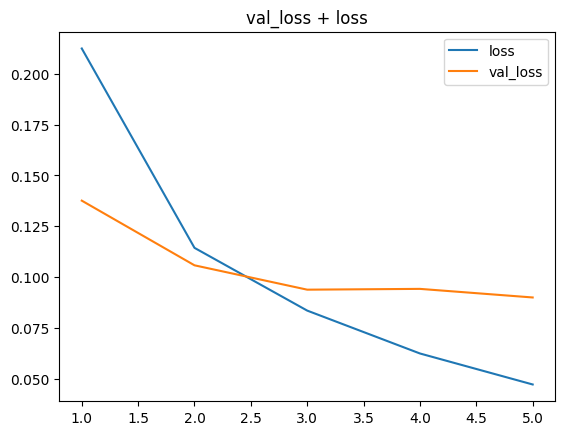

In [12]:
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

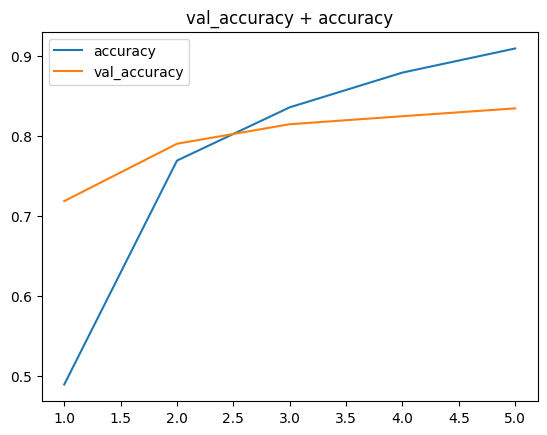

In [13]:
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()